In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading dataset

In [2]:
energy=pd.read_csv('energy.csv')
energy

,Household_ID,Country,Energy_Source,Monthly_Usage_kWh,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,USA,Hydro,1043.49,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Geothermal,610.01,4,High,Rural,2023,No,43.49
2,H02654,USA,Biomass,1196.75,8,Low,Rural,2017,Yes,93.28
3,H01056,Colombia,Biomass,629.67,7,High,Urban,2023,No,472.85
4,H00706,Egypt,Hydro,274.46,7,Middle,Rural,2010,No,65.98
...,...,...,...,...,...,...,...,...,...,...
995,H04712,Japan,Wind,1056.65,6,Middle,Urban,2018,No,307.67
996,H02314,USA,Wind,1182.33,2,High,Rural,2019,No,125.96
997,H03215,Germany,Wind,417.88,6,Middle,Rural,2010,Yes,273.25
998,H02733,Australia,Biomass,258.91,7,Middle,Urban,2017,Yes,224.35


In [3]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Country            1000 non-null   object 
 2   Energy_Source      1000 non-null   object 
 3   Monthly_Usage_kWh  1000 non-null   float64
 4   Household_Size     1000 non-null   int64  
 5   Income_Level       1000 non-null   object 
 6   Urban_Rural        1000 non-null   object 
 7   Adoption_Year      1000 non-null   int64  
 8   Subsidy_Received   1000 non-null   object 
 9   Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [4]:
energy['Number_of_Years']=2024-energy['Adoption_Year']

In [5]:
new_order=energy.columns[[0,1,2,4,5,6,8,7,10,3,9]]
energy=energy[new_order]
energy

,Household_ID,Country,Energy_Source,Household_Size,Income_Level,Urban_Rural,Subsidy_Received,Adoption_Year,Number_of_Years,Monthly_Usage_kWh,Cost_Savings_USD
0,H01502,USA,Hydro,5,Low,Urban,No,2012,12,1043.49,10.46
1,H02587,Australia,Geothermal,4,High,Rural,No,2023,1,610.01,43.49
2,H02654,USA,Biomass,8,Low,Rural,Yes,2017,7,1196.75,93.28
3,H01056,Colombia,Biomass,7,High,Urban,No,2023,1,629.67,472.85
4,H00706,Egypt,Hydro,7,Middle,Rural,No,2010,14,274.46,65.98
...,...,...,...,...,...,...,...,...,...,...,...
995,H04712,Japan,Wind,6,Middle,Urban,No,2018,6,1056.65,307.67
996,H02314,USA,Wind,2,High,Rural,No,2019,5,1182.33,125.96
997,H03215,Germany,Wind,6,Middle,Rural,Yes,2010,14,417.88,273.25
998,H02733,Australia,Biomass,7,Middle,Urban,Yes,2017,7,258.91,224.35


#Correlation Heatmap

<Axes: >

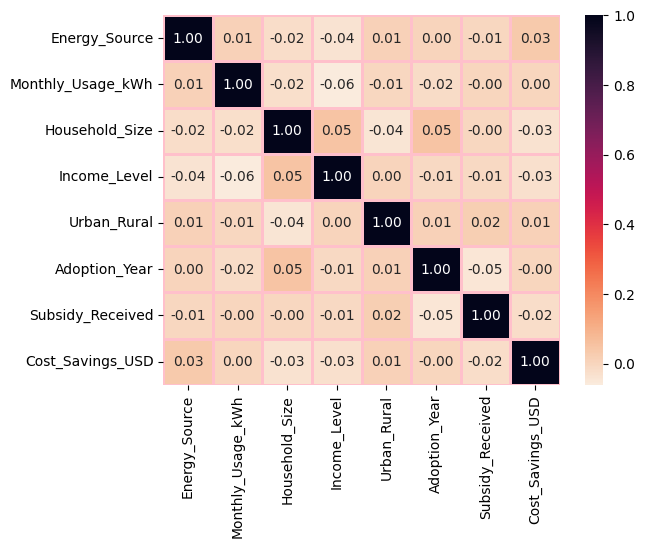

In [6]:
e1=pd.read_csv('energy.csv')
e1['Energy_Source']=e1['Energy_Source'].map({'Biomass':0,'Geothermal':1,'Hydro':2,'Solar':3,'Wind':4})
e1['Income_Level']=e1['Income_Level'].map({"Low":0,'Middle':1,'High':2})
e1['Urban_Rural']=e1['Urban_Rural'].map({"Urban":0,'Rural':1})
e1['Subsidy_Received']=e1['Subsidy_Received'].map({'No':0,'Yes':1})
e1
co=e1.corr(numeric_only=True)
sns.heatmap(data=co,annot=True,linewidth=2,linecolor='pink',cmap='rocket_r',fmt='.2f')

#Which country uses most renewable energy

In [7]:
g1=energy.groupby('Country')
g1.count()

,Household_ID,Energy_Source,Household_Size,Income_Level,Urban_Rural,Subsidy_Received,Adoption_Year,Number_of_Years,Monthly_Usage_kWh,Cost_Savings_USD
Country,,,,,,,,,,
Argentina,33,33,33,33,33,33,33,33,33,33
Australia,84,84,84,84,84,84,84,84,84,84
Brazil,35,35,35,35,35,35,35,35,35,35
Canada,60,60,60,60,60,60,60,60,60,60
Chile,26,26,26,26,26,26,26,26,26,26
China,27,27,27,27,27,27,27,27,27,27
Colombia,34,34,34,34,34,34,34,34,34,34
Egypt,36,36,36,36,36,36,36,36,36,36
France,36,36,36,36,36,36,36,36,36,36


<ipython-input-8-a243576aef43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.countplot(data=energy,x='Country',palette='coolwarm')


Text(0.5, 1.0, 'Number of energy usages in different Countries')

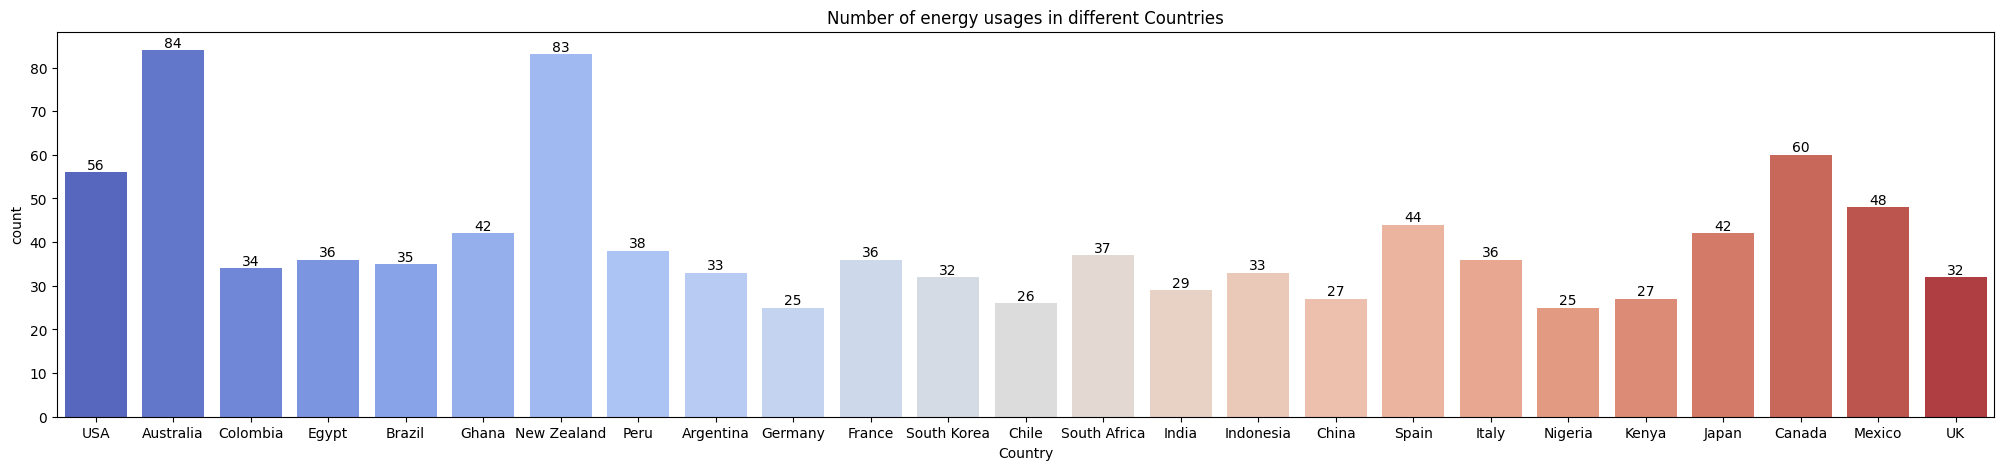

In [8]:
plt.figure(figsize=(25,5))
obj=sns.countplot(data=energy,x='Country',palette='coolwarm')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Number of energy usages in different Countries')

observation:
* Australia uses more number of renewable energy
* Germany and Nigeria are using least amount of energy

#What is the average usage of energy in different countries?

In [9]:
pd.pivot_table(data=energy,values='Monthly_Usage_kWh',index='Country',aggfunc='mean')

,Monthly_Usage_kWh
Country,
Argentina,757.757576
Australia,795.178452
Brazil,822.522000
Canada,735.719667
Chile,531.940769
China,837.982222
Colombia,895.037941
Egypt,861.493333
France,863.937500


<ipython-input-10-2810bffb9d33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.barplot(data=energy,x='Country',y='Monthly_Usage_kWh',palette='rainbow')


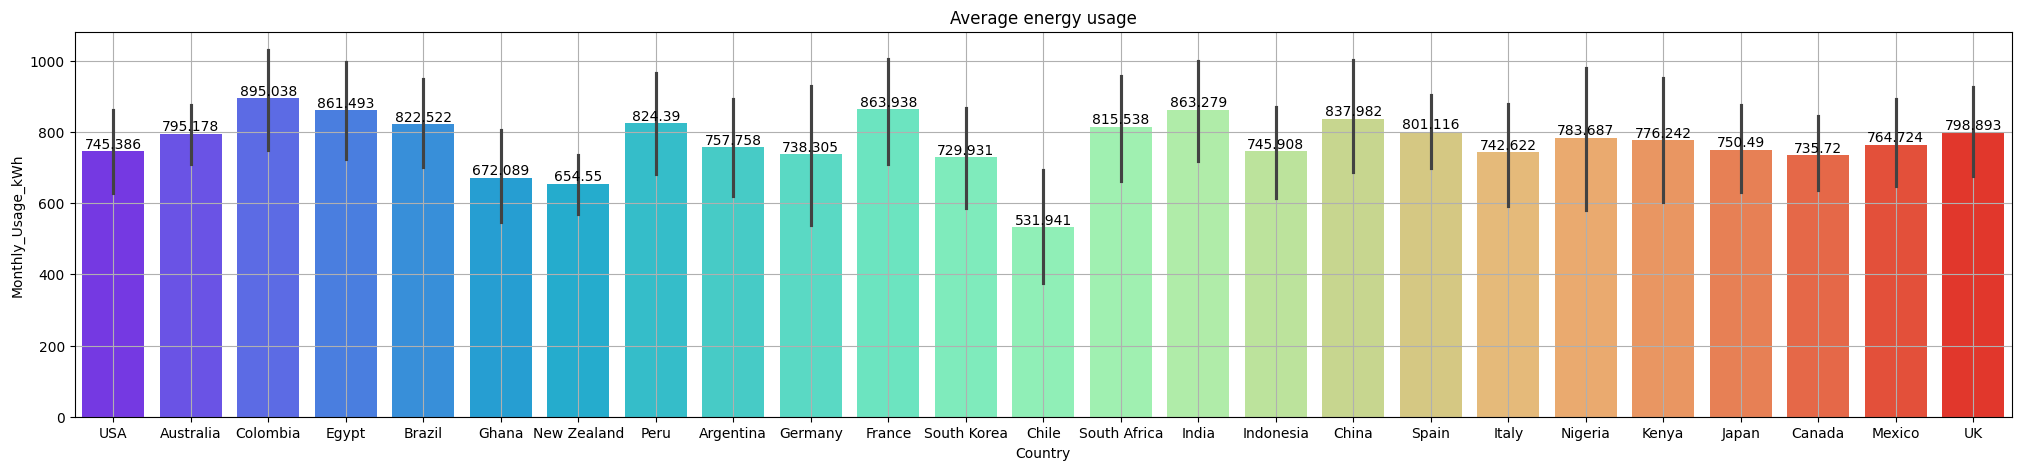

In [10]:
plt.figure(figsize=(25,5))
obj=sns.barplot(data=energy,x='Country',y='Monthly_Usage_kWh',palette='rainbow')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average energy usage')
plt.grid()

observation:
* Columbia is the country with the highest average usage of renewable energy
* Chile is the country with the lowest average usage of renewable energy

#What is the maximum and minimum monthly energy usage in different countries?

In [11]:
data=pd.pivot_table(data=energy,values='Monthly_Usage_kWh',index='Country',aggfunc=['min','max'])
data.columns
data

,min,max
,Monthly_Usage_kWh,Monthly_Usage_kWh
Country,,
Argentina,66.70,1457.10
Australia,87.36,1488.63
Brazil,117.21,1484.38
Canada,63.29,1488.85
Chile,53.61,1349.00
China,104.57,1457.70
Colombia,70.26,1496.45
Egypt,93.25,1477.01


<ipython-input-12-f2ca7858ecfc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.barplot(data=data,x='Country',y=('min','Monthly_Usage_kWh'),palette='viridis')
<ipython-input-12-f2ca7858ecfc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.barplot(data=data,x='Country',y=('max','Monthly_Usage_kWh'),palette='magma')


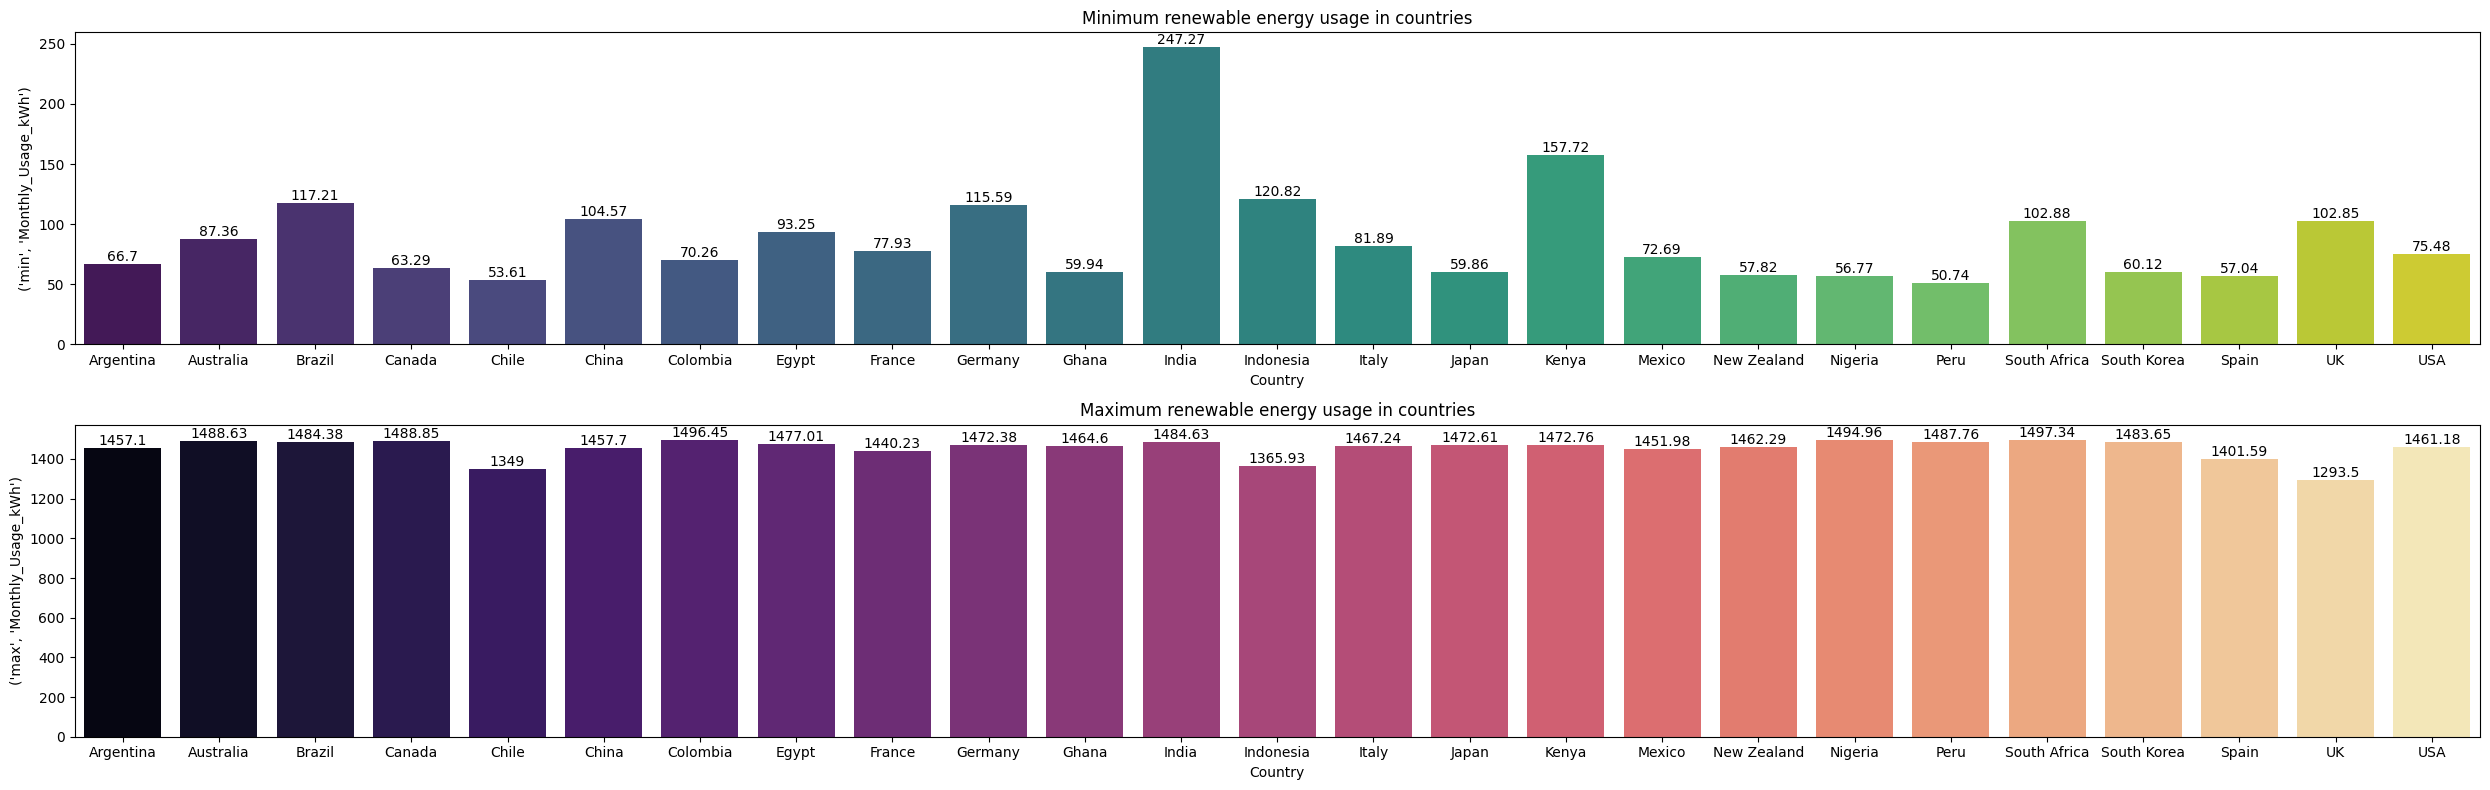

In [12]:
plt.figure(figsize=(25,8))

plt.subplot(2,1,1)
obj=sns.barplot(data=data,x='Country',y=('min','Monthly_Usage_kWh'),palette='viridis')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Minimum renewable energy usage in countries")

plt.subplot(2,1,2)
obj=sns.barplot(data=data,x='Country',y=('max','Monthly_Usage_kWh'),palette='magma')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Maximum renewable energy usage in countries")

plt.tight_layout()

observation:
* The minimum energy used by households was marked in Chile and Peru
* Country with highest minimal usage is India
* The maximum amount of energy used by households was marked Columbia, Nigeria and South Africa
* Country with lowest maximum usage is UK

#What is the average household size of each country

In [13]:
g1=energy.groupby('Country')
g1['Household_Size'].mean()

,Household_Size
Country,
Argentina,4.666667
Australia,4.642857
Brazil,4.771429
Canada,3.966667
Chile,4.884615
China,4.703704
Colombia,4.676471
Egypt,4.638889
France,4.638889


<ipython-input-14-4678b2e9f36e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=energy,x='Country',y='Household_Size',palette='coolwarm')


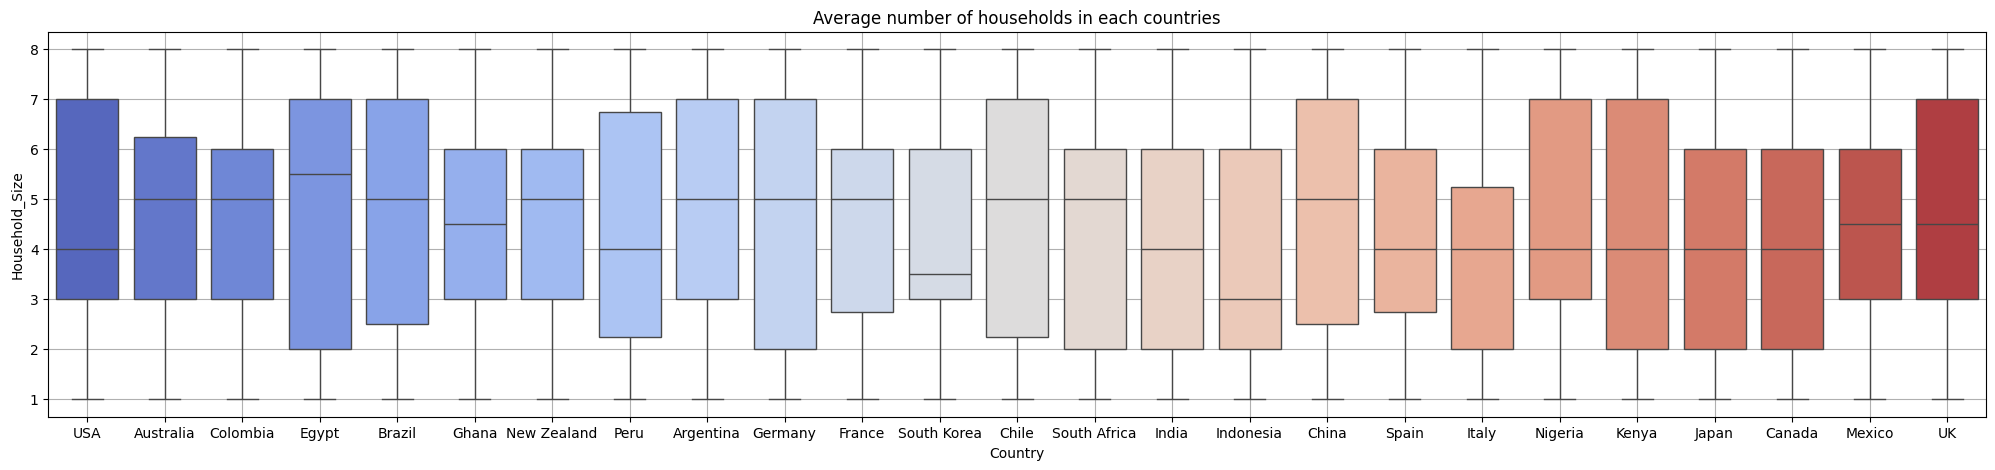

In [14]:
plt.figure(figsize=(25,5))
sns.boxplot(data=energy,x='Country',y='Household_Size',palette='coolwarm')
plt.title("Average number of households in each countries")
plt.grid()

observation:
* The maximum ans minimum number of households are 8 and 1
* Egypt is having highest average of households
* Indonesia is having lowest average of households

#What is the average Cost Savings in each country

In [15]:
g1=energy.groupby('Country')
g1['Cost_Savings_USD'].mean()


,Cost_Savings_USD
Country,
Argentina,267.667576
Australia,228.981667
Brazil,257.910000
Canada,223.651167
Chile,257.251538
China,313.657778
Colombia,291.162941
Egypt,226.308889
France,237.947222


<ipython-input-16-bef0a364fee5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.barplot(data=energy,x='Country',y='Cost_Savings_USD',palette='magma')


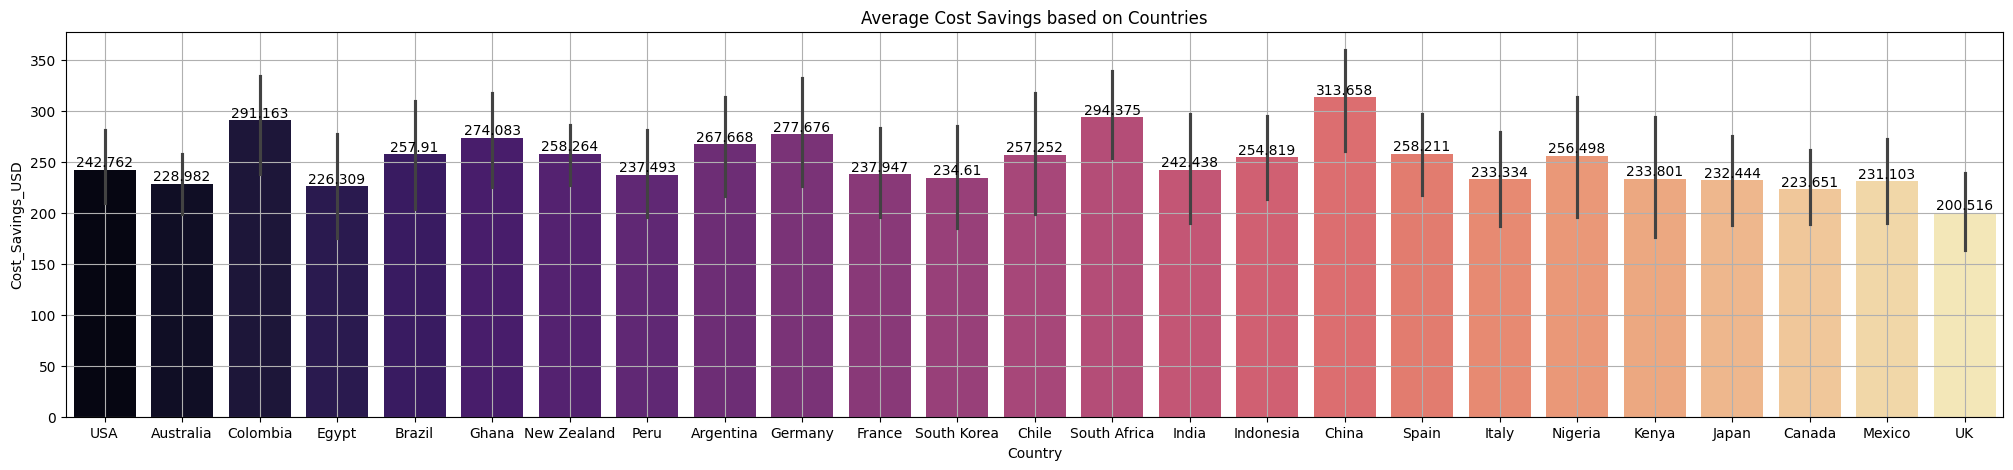

In [16]:
plt.figure(figsize=(25,5))
obj=sns.barplot(data=energy,x='Country',y='Cost_Savings_USD',palette='magma')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Average Cost Savings based on Countries")
plt.grid()

observation:
* China saves financial assets on a large scale, by using renewable energy
* UK is the country with lowest savings

#Which energy is used most by different countries

In [17]:
data=pd.pivot_table(data=energy,index='Energy_Source',values='Country',aggfunc='count')
data

,Country
Energy_Source,
Biomass,193
Geothermal,180
Hydro,199
Solar,201
Wind,227


<ipython-input-18-2f3b28d07d9c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.countplot(data=energy,x='Energy_Source',palette='rocket')


Text(0.5, 1.0, 'Number of households using different Energy Sources')

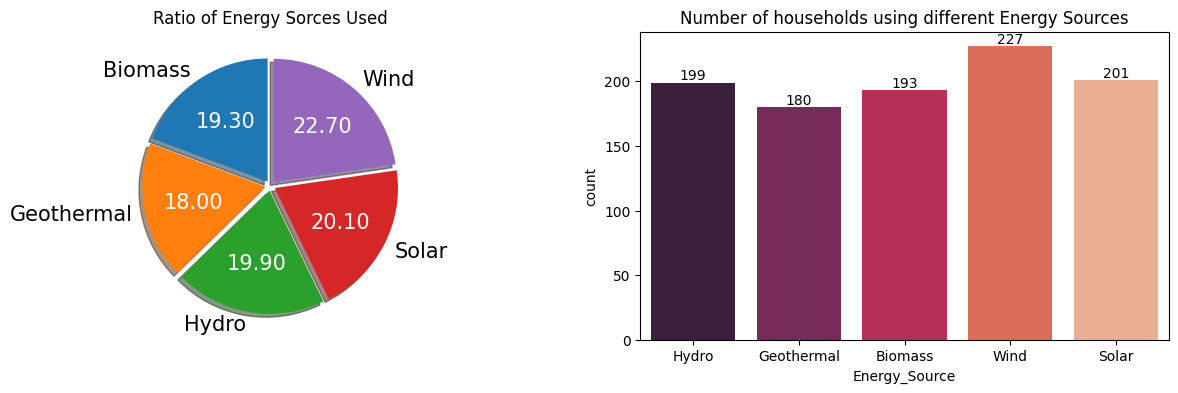

In [18]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
d=[(energy['Energy_Source']=='Biomass').sum(),(energy['Energy_Source']=='Geothermal').sum(),(energy['Energy_Source']=='Hydro').sum(),(energy['Energy_Source']=='Solar').sum(),
 (energy['Energy_Source']=='Wind').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04,0.04,0.04,0.04],labels=['Biomass','Geothermal','Hydro','Solar','Wind'],shadow=True,startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(15)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.title('Ratio of Energy Sorces Used')


plt.subplot(1,2,2)
obj=sns.countplot(data=energy,x='Energy_Source',palette='rocket')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Number of households using different Energy Sources')



observation:
* Wind energy is used most by different households
* The least used one is geothermal energy

#What is the average usgae of each energy type?

In [19]:
pd.pivot_table(data=energy,values='Monthly_Usage_kWh',index='Energy_Source',aggfunc='mean')

,Monthly_Usage_kWh
Energy_Source,
Biomass,765.934041
Geothermal,757.497056
Hydro,776.461005
Solar,742.519403
Wind,790.258370


<ipython-input-20-9d51b62fa30b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=energy,x='Energy_Source',y='Monthly_Usage_kWh',palette='viridis')


Text(0.5, 1.0, 'Monthly usage of energy sources')

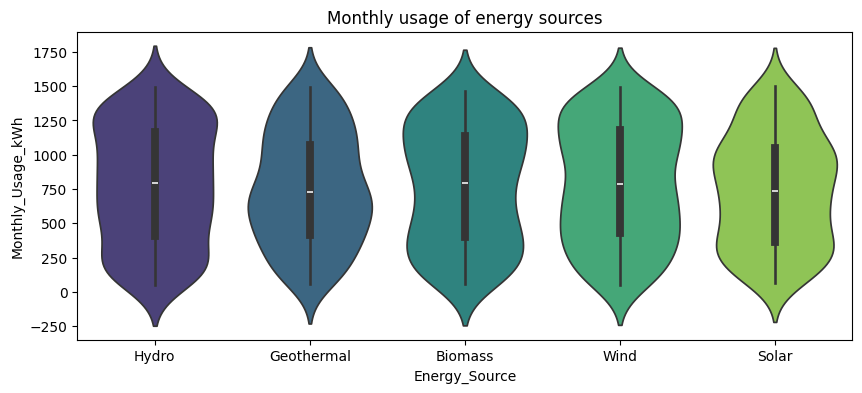

In [20]:
plt.figure(figsize=(10,4))
sns.violinplot(data=energy,x='Energy_Source',y='Monthly_Usage_kWh',palette='viridis')
plt.title('Monthly usage of energy sources')
# plt.grid()

observation:
* Wind energy is the most used energy on a monthly basis
* Solar energy is the least used

#Which energy is suitable depending on different household sizes

In [21]:
pd.pivot_table(data=energy,values='Household_Size',index='Energy_Source',aggfunc=['count','mean','max','min'])

,count,mean,max,min
,Household_Size,Household_Size,Household_Size,Household_Size
Energy_Source,,,,
Biomass,193,4.585492,8,1
Geothermal,180,4.516667,8,1
Hydro,199,4.412060,8,1
Solar,201,4.457711,8,1
Wind,227,4.440529,8,1


<ipython-input-22-6a824935ea4b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=energy,x='Energy_Source',y='Household_Size',palette='viridis')


Text(0.5, 1.0, 'Energy source and household')

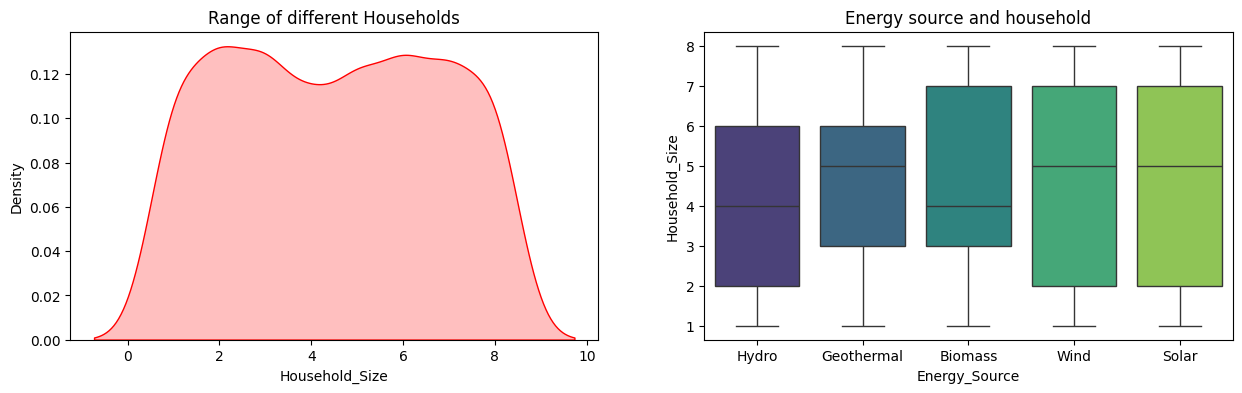

In [22]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.kdeplot(data=energy,x='Household_Size',color='red',fill=True)
plt.title("Range of different Households")

plt.subplot(1,2,2)
sns.boxplot(data=energy,x='Energy_Source',y='Household_Size',palette='viridis')
plt.title("Energy source and household")

observation:
* Most of the households sizes are in range 2-3 and 6-7
* For increased number of households, the suitable energy sources are geothermal, wind and solar
* Geothermal is the best choice

#Find count of each household class according to their income levels in rural and urban areas

In [23]:
pd.pivot_table(data=energy,index=['Urban_Rural','Income_Level'],values='Energy_Source',aggfunc='count')

Energy_Source
Urban_Rural Income_Level               
Rural       High                    169
            Low                     158
            Middle                  187
Urban       High                    161
            Low                     154
            Middle                  171

Text(0.5, 1.0, 'Ratio of households in Urban and Rural')

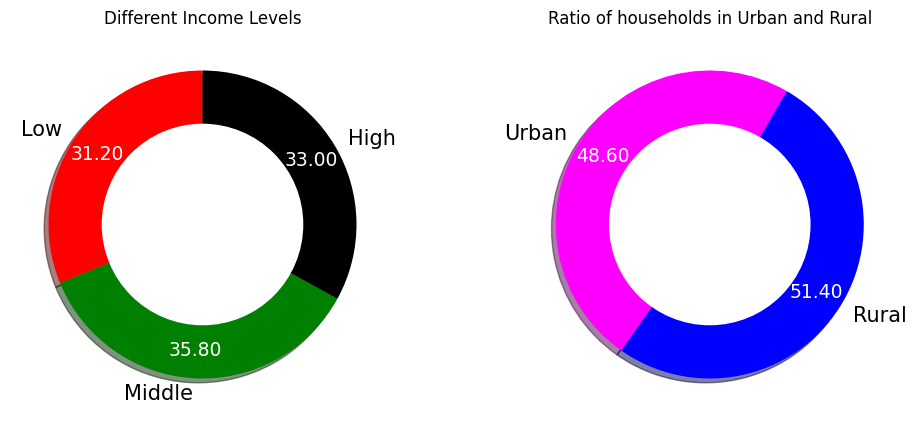

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
d=[(energy['Income_Level']=='Low').sum(),(energy['Income_Level']=='Middle').sum(),(energy['Income_Level']=='High').sum()]
widget,text,sliceText=plt.pie(d,labels=['Low','Middle','High'],shadow=True,startangle=90,autopct='%.2f',pctdistance=0.82,colors=['red','green','black'])
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(13.5)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
my_circle=plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Different Income Levels')

plt.subplot(1,2,2)
d=[(energy['Urban_Rural']=='Urban').sum(),(energy['Urban_Rural']=='Rural').sum()]
widget,text,sliceText=plt.pie(d,labels=['Urban','Rural'],shadow=True,startangle=60,autopct='%.2f',pctdistance=0.82,colors=['magenta','blue'])
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(13.5)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
my_circle=plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Ratio of households in Urban and Rural')

observation:
* More households are with middle income level
* Most households are located in rural areas

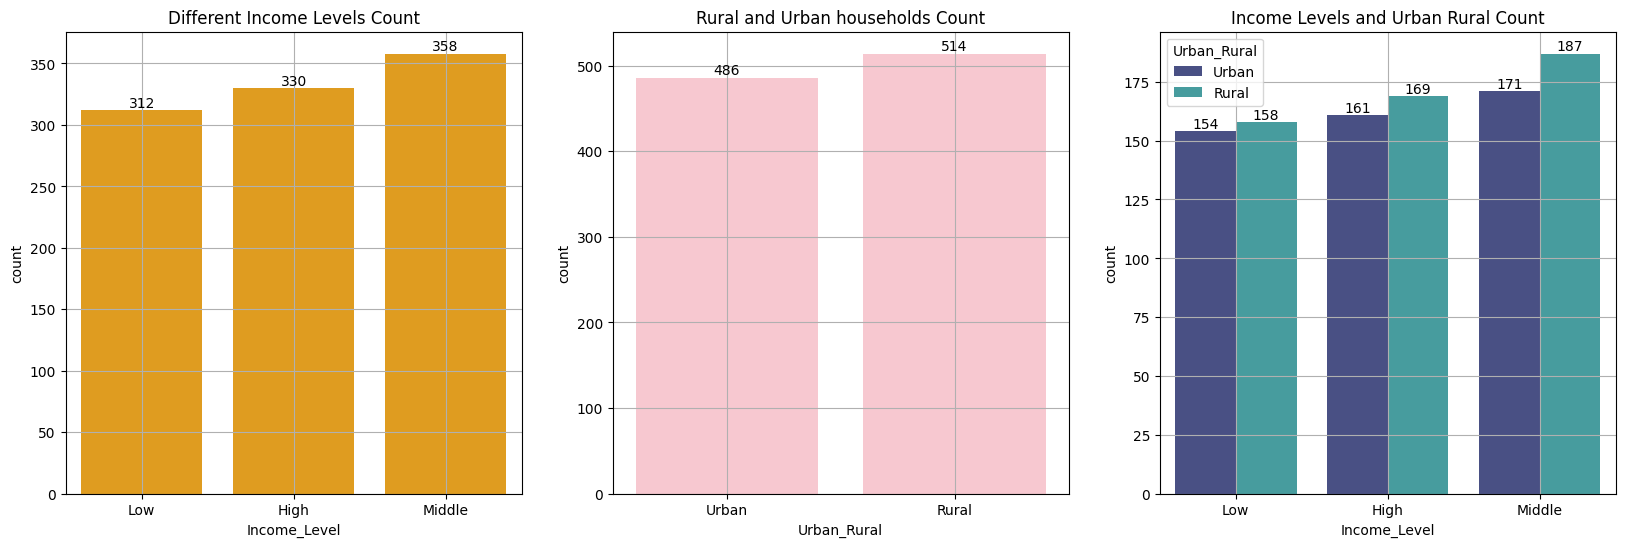

In [25]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
obj=sns.countplot(data=energy,x='Income_Level',color='orange')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Different Income Levels Count")
plt.grid()

plt.subplot(1,3,2)
obj=sns.countplot(data=energy,x='Urban_Rural',color='pink')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Rural and Urban households Count")
plt.grid()

plt.subplot(1,3,3)
obj=sns.countplot(data=energy,hue='Urban_Rural',palette='mako',x='Income_Level')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Income Levels and Urban Rural Count")
plt.grid()

observation:
* The number of middle class households are higher
* Most of the households are situated in rural areas(less populated)
* The number of low class households in urban areas are least

#Find the energy selection based on income and population size

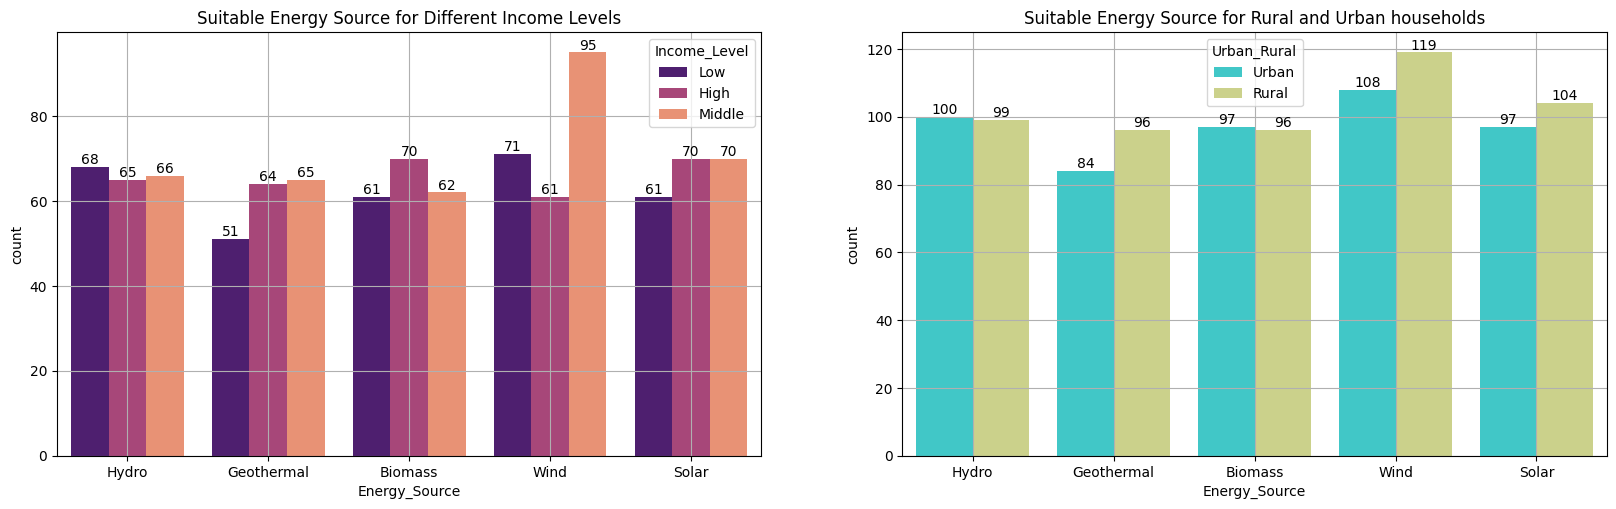

In [26]:
plt.figure(figsize=(20,5.5))

plt.subplot(1,2,1)
obj=sns.countplot(data=energy,x='Energy_Source',palette='magma',hue='Income_Level')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Suitable Energy Source for Different Income Levels")
plt.grid()

plt.subplot(1,2,2)
obj=sns.countplot(data=energy,hue='Urban_Rural',palette='rainbow',x='Energy_Source')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Suitable Energy Source for Rural and Urban households")
plt.grid()

observation:
* For households with low income level, Wind energy is suitable
* For households with middle income level, Wind energy is suitable
* For households with high income level, Biomass energy is suitable
* For households in both urban and rural areas, Wind energy is suitable

Text(0.5, 1.0, 'Count of Subsidies Received for different Energy Sources')

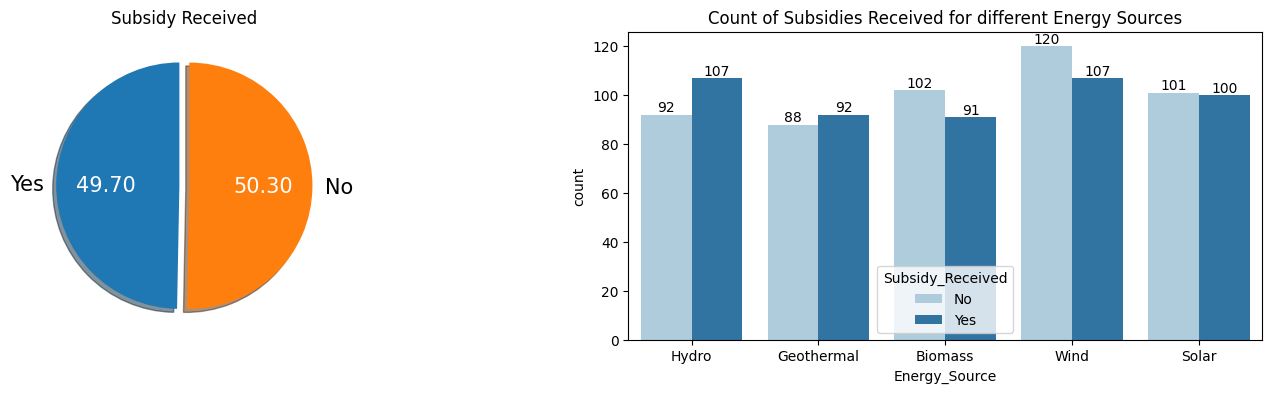

In [27]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
d=[(energy['Subsidy_Received']=='Yes').sum(),(energy['Subsidy_Received']=='No').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04],labels=['Yes','No'],shadow=True,startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(15)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.title('Subsidy Received')


plt.subplot(1,2,2)
obj=sns.countplot(data=energy,x='Energy_Source',hue='Subsidy_Received',palette='Paired')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of Subsidies Received for different Energy Sources')

observation:
* For half of the households, subsidies were not received for renewable energy
* The count of households without subsidies is higher for wind energy and lower for Geothermal energy
* The count of households with subsidies is higher for wind and hydro energy and lower for Biomass and Geothermal energy

#Find average Cost Savings for each energy source

In [28]:
pd.pivot_table(data=energy,values='Cost_Savings_USD',index='Energy_Source',aggfunc=['mean','max','min'])

,mean,max,min
,Cost_Savings_USD,Cost_Savings_USD,Cost_Savings_USD
Energy_Source,,,
Biomass,257.462176,499.31,12.59
Geothermal,230.052111,499.12,10.42
Hydro,237.010804,499.53,10.46
Solar,254.123383,499.83,11.02
Wind,260.115947,498.90,13.63


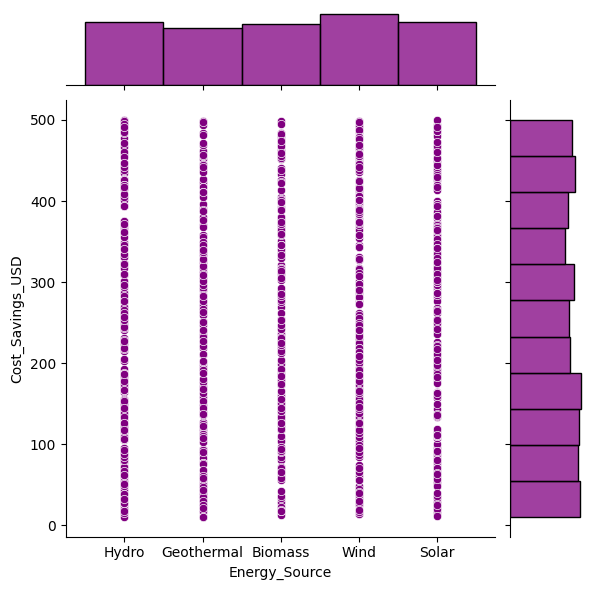

In [29]:
sns.jointplot(data=energy,x='Energy_Source',y='Cost_Savings_USD',color='purple')

<ipython-input-30-ac702a5d434d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.barplot(data=energy,x='Energy_Source',y='Cost_Savings_USD',palette='rainbow')


Text(0.5, 1.0, 'Energy Sorce with average Cost of Savings')

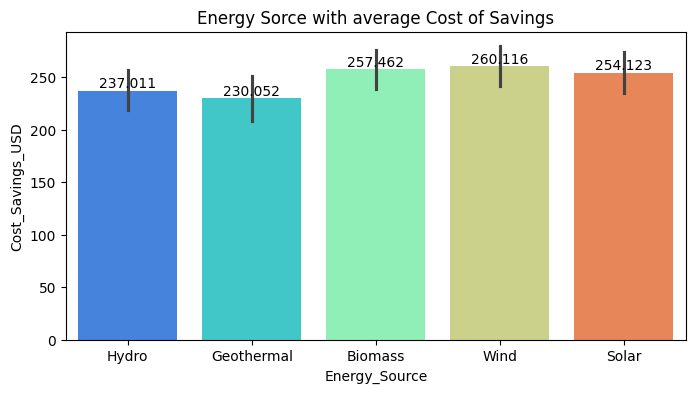

In [30]:
plt.figure(figsize=(8,4))
obj=sns.barplot(data=energy,x='Energy_Source',y='Cost_Savings_USD',palette='rainbow')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Energy Sorce with average Cost of Savings')

observation:
* The Cost Savings are more for Wind energy
* Geothermal energy has the least Cost Savings

#Which years have the maximum adoptions?

Text(0.5, 1.0, 'Adoptions in different years')

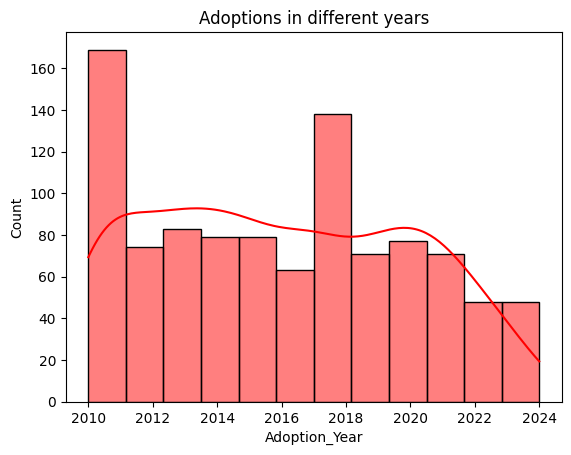

In [31]:
sns.histplot(data=energy,x='Adoption_Year',kde=True,color='red')
plt.title("Adoptions in different years")

observation:
* Most adoptions were made in 2010
* The number of adoptions increased in 2018 and is decreasing towards 2024
* The years 2022-24 are having the least number of adoptions of energy sources

#How the monthly usage of energy has changed over the years?

In [32]:
pd.pivot_table(data=energy,values='Monthly_Usage_kWh',index='Adoption_Year',aggfunc='mean')

,Monthly_Usage_kWh
Adoption_Year,
2010,755.469222
2011,803.892025
2012,760.383378
2013,869.301566
2014,695.572025
2015,703.948734
2016,752.817778
2017,785.322000
2018,757.785345


Text(0.5, 1.0, 'Monthly Usage over the years')

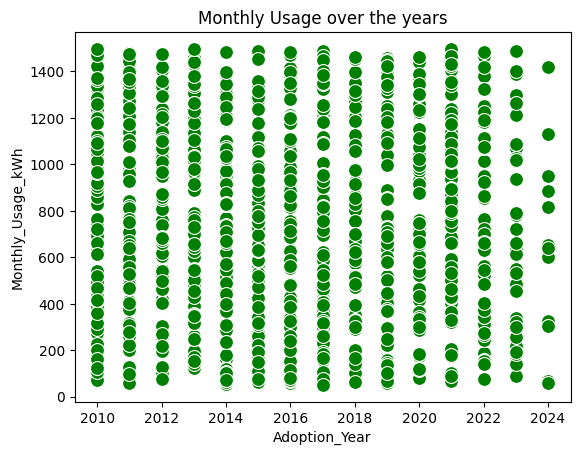

In [33]:
sns.scatterplot(data=energy,x='Adoption_Year',y='Monthly_Usage_kWh',color='green',s=100)
plt.title("Monthly Usage over the years")

conclusion:
* Most of the households adopted renewable energy in the year range 2010-2017
* The number of adoptions became less towards 2024
* The monthly usage remains almost constant among the years

#Find relation between number of years and monthly usage

In [34]:
pd.pivot_table(data=energy,values='Monthly_Usage_kWh',index='Number_of_Years',aggfunc='mean')

,Monthly_Usage_kWh
Number_of_Years,
0,652.283846
1,680.478286
2,715.123542
3,832.711690
4,798.300390
5,780.625915
6,757.785345
7,785.322000
8,752.817778


Text(0.5, 1.0, 'Relation of monthly usage and number of years')

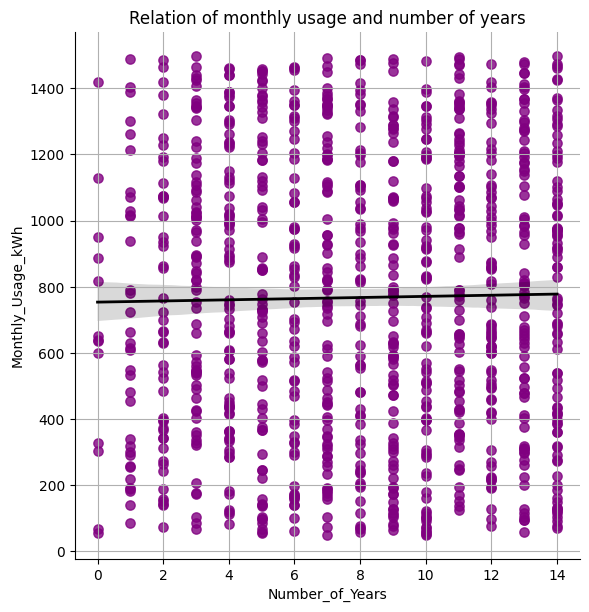

In [35]:
sns.lmplot(data=energy,y='Monthly_Usage_kWh',x="Number_of_Years",markers='o',height=6,scatter_kws={"s":45,'color':'purple'},line_kws={'color':'black','lw':2})
plt.grid()
plt.title("Relation of monthly usage and number of years")

observation:
* The monthly usage and number of years are having a slightly strong relation
* The usage increases with the increase in years
* More households are using energy in 2024 as datapoints are clustered in the region

#What is the highest range of Cost Savings?

Text(0.5, 1.0, 'Cost Savings')

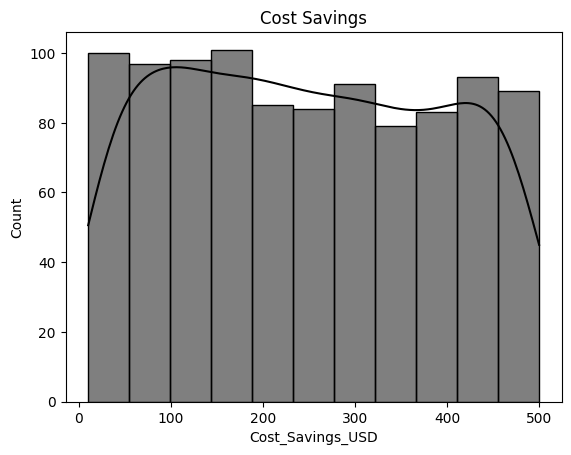

In [36]:
sns.histplot(data=energy,x='Cost_Savings_USD',color='black',kde=True)
plt.title("Cost Savings")

observation:
* Most Cost savings are in the range 0-150

#How the cost of savings has changed over years?

In [37]:
pd.pivot_table(data=energy,values='Cost_Savings_USD',index='Adoption_Year',aggfunc='mean')

,Cost_Savings_USD
Adoption_Year,
2010,269.250667
2011,264.191519
2012,211.470946
2013,264.136386
2014,236.928101
2015,220.376329
2016,234.995556
2017,267.455250
2018,261.655862


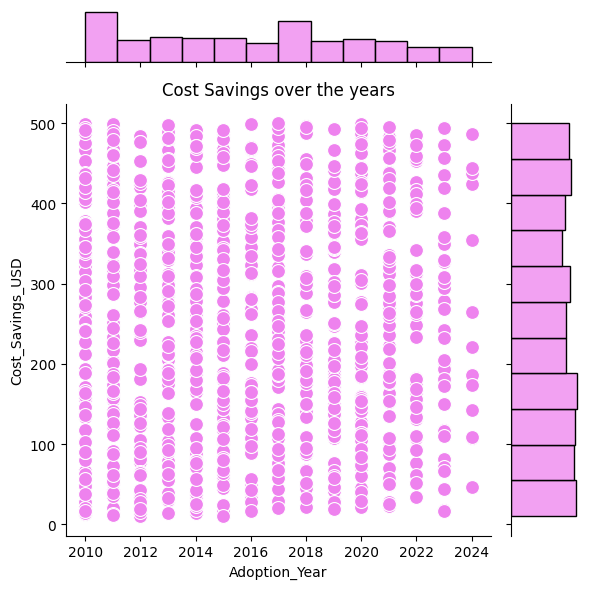

In [38]:
sns.jointplot(data=energy,x='Adoption_Year',y='Cost_Savings_USD',color='violet',s=100)
plt.title("Cost Savings over the years")
plt.tight_layout()

observation:
* The cost of Savings have slightly decreased and then increased over the years




#Find relation between number of years and Cost of Savings

In [39]:
pd.pivot_table(data=energy,values='Cost_Savings_USD',index='Number_of_Years',aggfunc='mean')

,Cost_Savings_USD
Number_of_Years,
0,261.339231
1,233.877714
2,263.526250
3,256.471127
4,250.722078
5,231.863662
6,261.655862
7,267.455250
8,234.995556


Text(0.5, 1.0, 'Relation of cost savings and number of years')

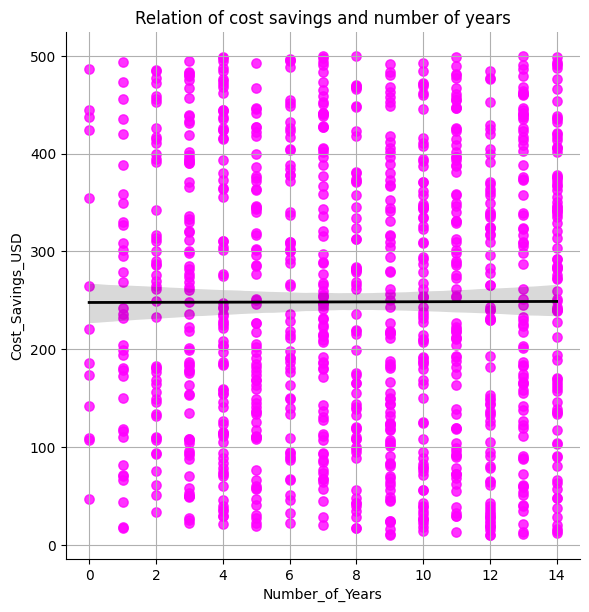

In [40]:
sns.lmplot(data=energy,y='Cost_Savings_USD',x="Number_of_Years",markers='o',height=6,scatter_kws={"s":45,'color':'magenta'},line_kws={'color':'black','lw':2})
plt.grid()
plt.title("Relation of cost savings and number of years")

observation:
* The cost of savings remains constant with increase in number of years

#Find relation between monthly usage and cost of savings

Text(0.5, 1.0, 'Relation of monthly usage and cost of savings')

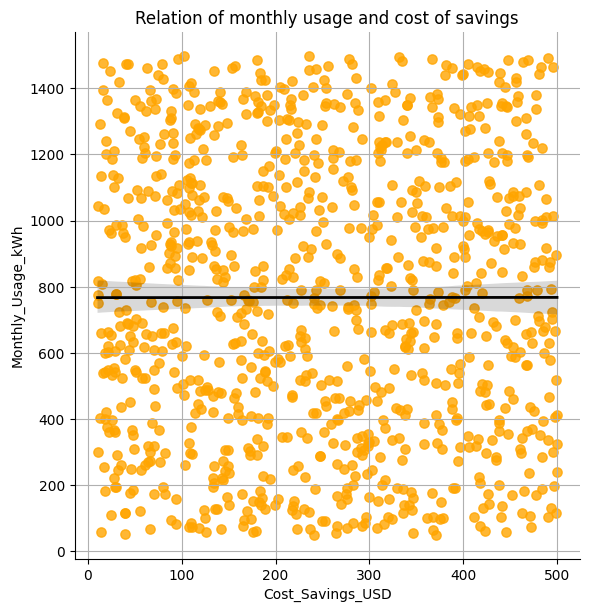

In [41]:
sns.lmplot(data=energy,y='Monthly_Usage_kWh',x="Cost_Savings_USD",markers='o',height=6,scatter_kws={"s":45,'color':'orange'},line_kws={'color':'black','lw':2})
plt.grid()
plt.title("Relation of monthly usage and cost of savings")

observation:
* The cost of savings remains constant with monthly usage

#Pair plot

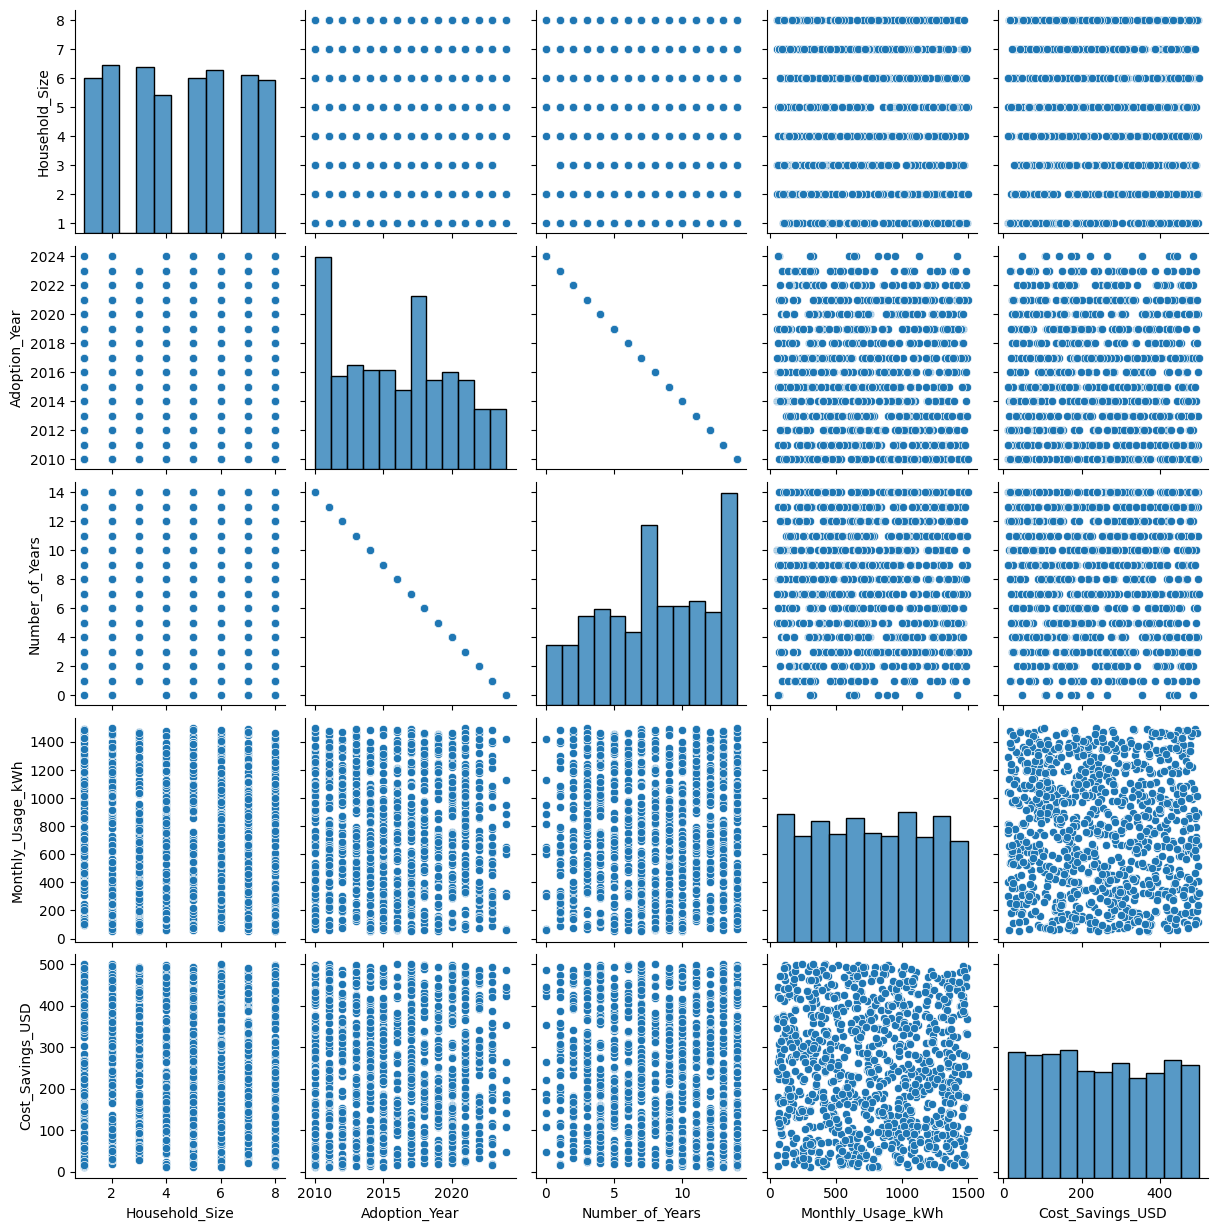

In [42]:
sns.pairplot(data=energy)

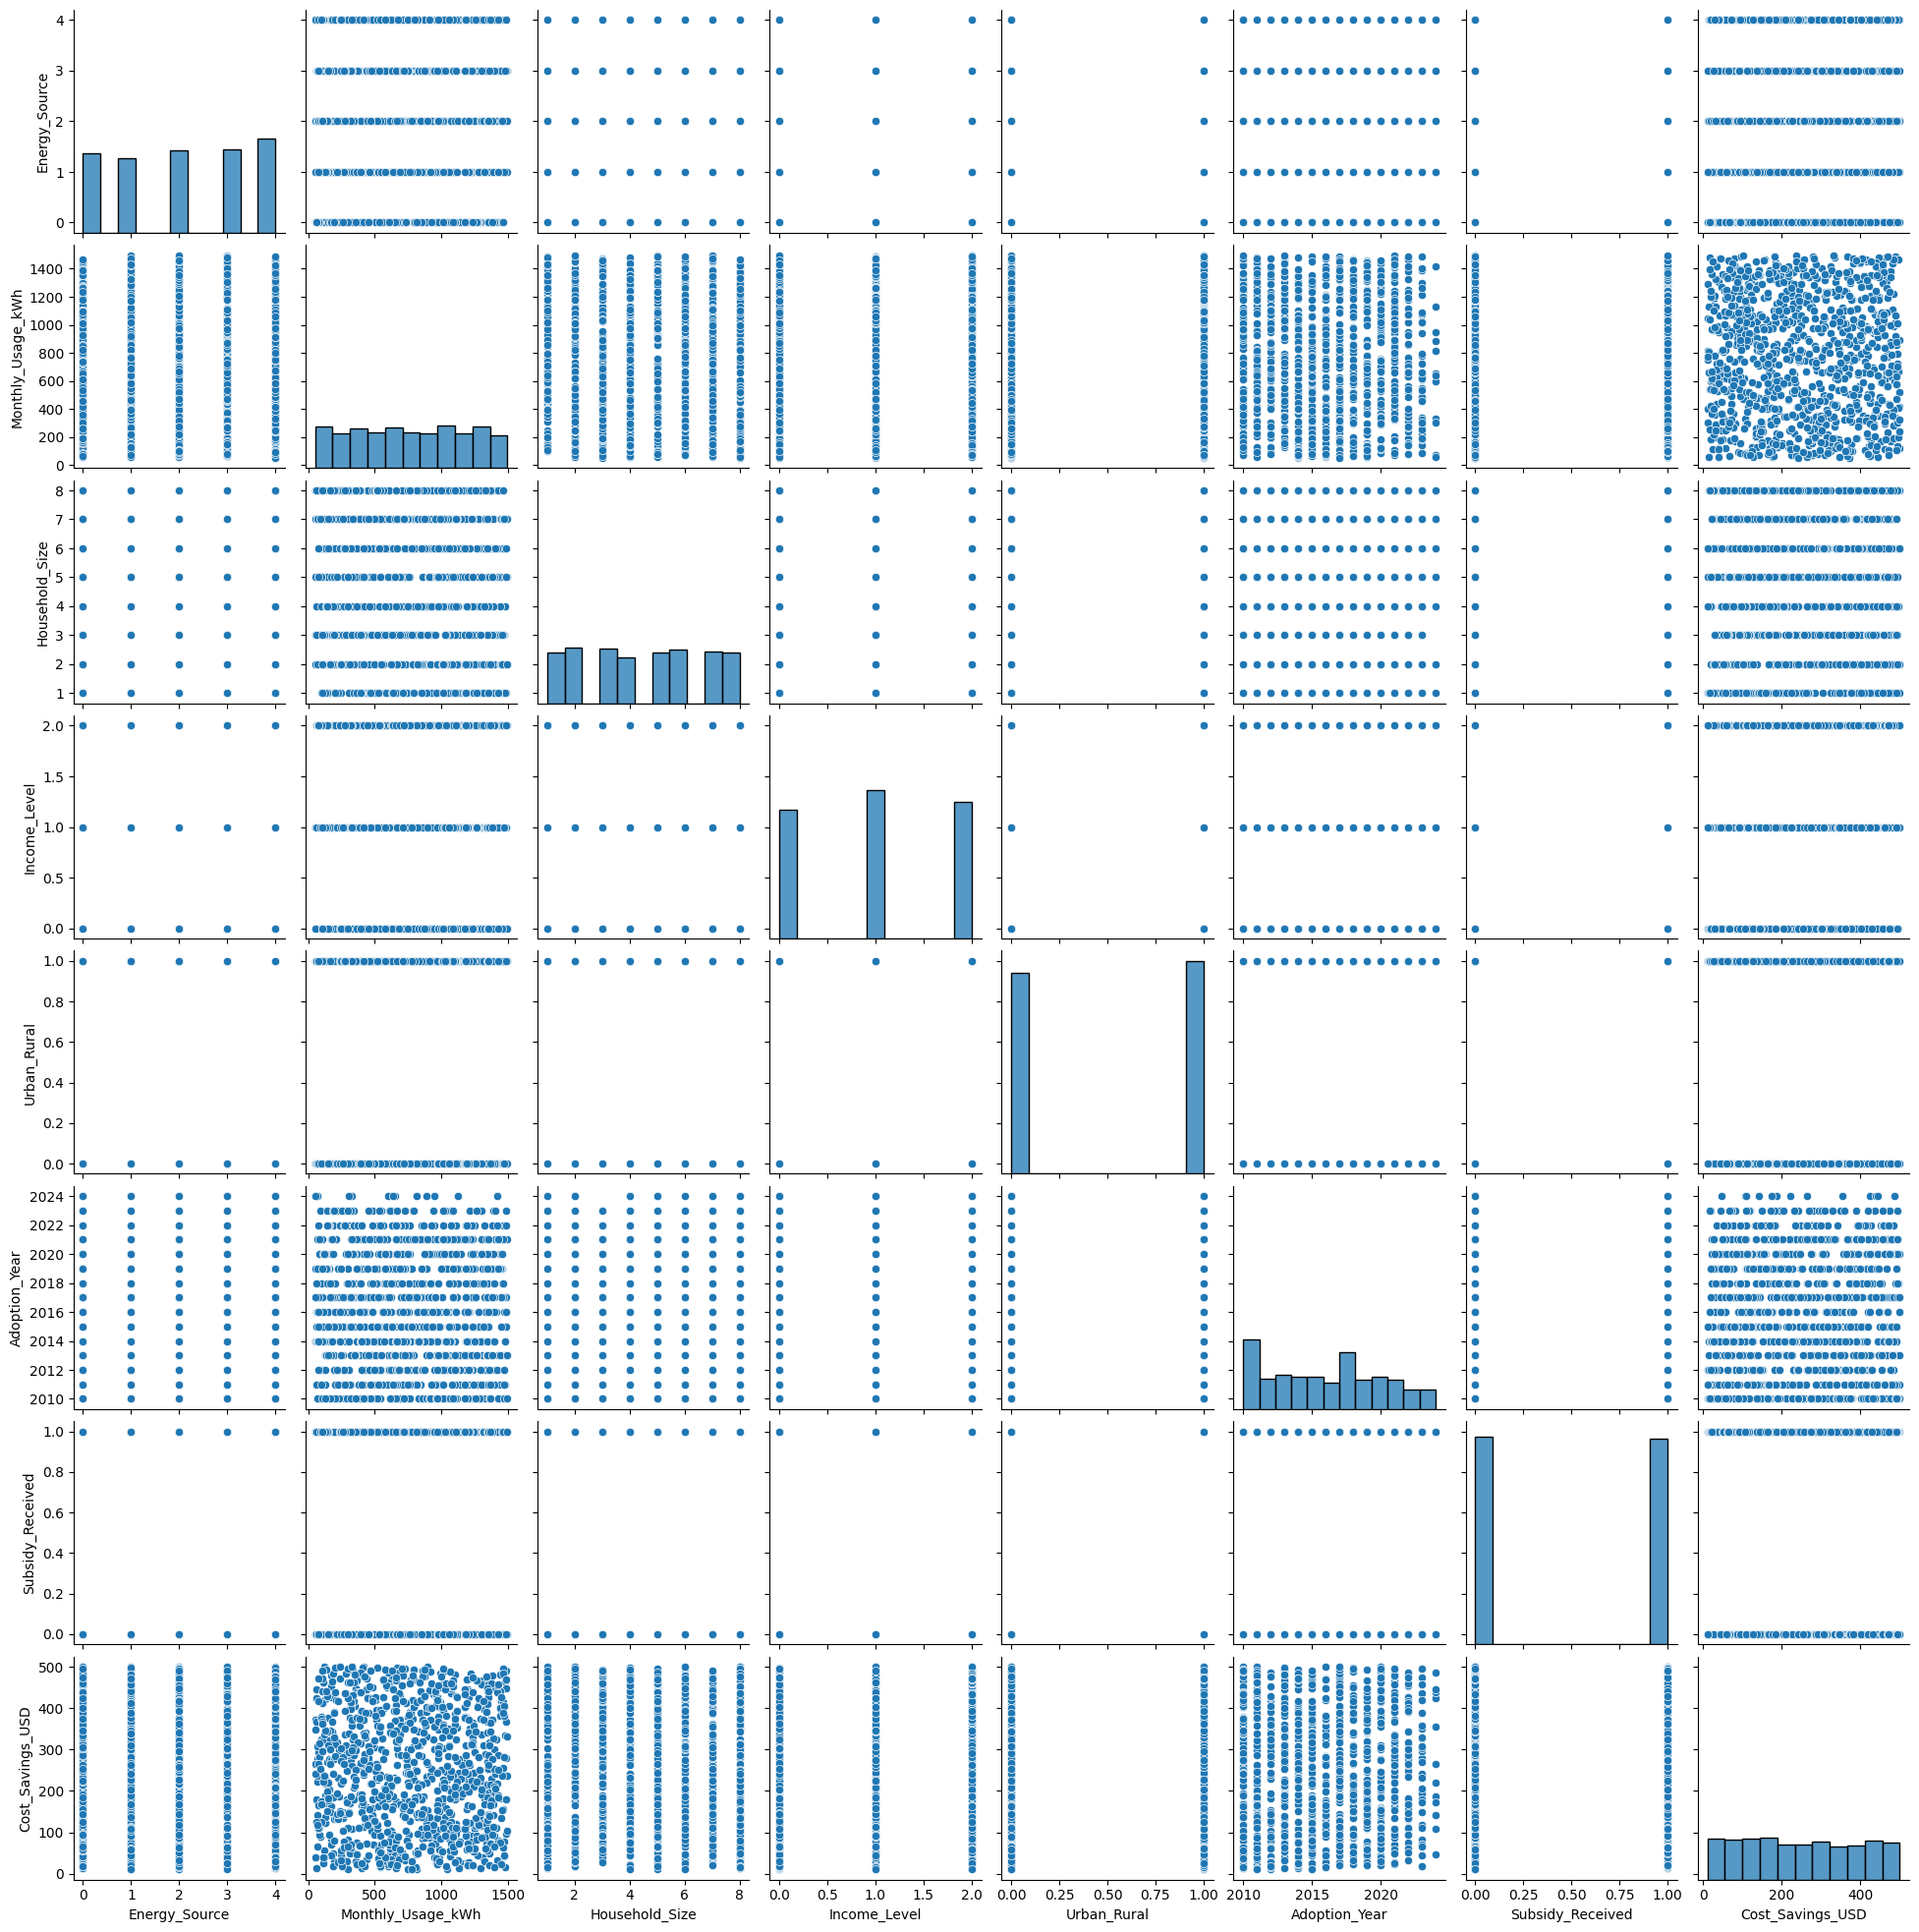

In [43]:
sns.pairplot(data=e1)

#Conclusion

ENERGY SOURCES
* The available energy sources are hydro,solar,wind,biomass and geothermal and are used across worldwide.
* The most used sources are wind and solar and the least used is geothermal energy
* Countries like Columbia, India, France use energy in large amount while countries like Chile are yet to adopt the practise
* On monthly basis, wind energy is used most and solar is uesd least
* For houses with large household sizes, geothermal or wind or solar energy is better choice
* Wind energy is used most irrespective of the income level of family and the location(urban or rural)


WAYS TO PROMOTE ENERGY USAGE AND INCREASE COST OF SAVINGS
* Promoting or increasing the adoption of energy sources associated with lower costs and higher savings, especially in areas with higher energy consumption
*  Focusing energy sources incrementation in rural areas to increase access to renewable or cost-effective energy sources. Subsidy policies could also be changed based on Income_Level.
* Promoting renewable enrgy usage in developing countries